# CRIPTOMONEDA
Una **criptomoneda** es una forma de dinero digital o virtual que utiliza criptografía para asegurar las transacciones y controlar la creación de nuevas unidades. A diferencia de las monedas tradicionales, las criptomonedas operan en una red descentralizada basada en la tecnología blockchain



<div style="text-align: center;">
  <img src="https://s2.coinmarketcap.com/static/img/coins/200x200/1.png" alt="BIT COIN">
</div>



# Análisis del Mercado de Criptomonedas
**Objetivos**

- Obtener datos en tiempo real sobre precios de criptomonedas, capitalización de mercado, volumen de comercio, y otras métricas relevantes.

In [4]:
import requests

def obtener_datos_completos_bitcoin():
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    params = {
        'vs_currency': 'usd',
        'ids': 'bitcoin'
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        if data:
            bitcoin_data = data[0]
            precio = bitcoin_data['current_price']
            market_cap = bitcoin_data['market_cap']
            volumen_comercio = bitcoin_data['total_volume']
            maximo_24h = bitcoin_data['high_24h']
            minimo_24h = bitcoin_data['low_24h']
            cambio_porcentual_24h = bitcoin_data['price_change_percentage_24h']

            print(f'Precio actual de Bitcoin (USD): {precio}')
            print(f'Capitalización de mercado de Bitcoin (USD): {market_cap}')
            print(f'Volumen de comercio en 24h (USD): {volumen_comercio}')
            print(f'Máximo en 24h (USD): {maximo_24h}')
            print(f'Mínimo en 24h (USD): {minimo_24h}')
            print(f'Cambio porcentual en 24h: {cambio_porcentual_24h}%')
        else:
            print('No se pudo obtener los datos de Bitcoin.')
    except requests.exceptions.RequestException as e:
        print(f'Error al realizar la solicitud: {e}')
    except ValueError:
        print('Error al analizar la respuesta JSON.')

if __name__ == '__main__':
    obtener_datos_completos_bitcoin()


Precio actual de Bitcoin (USD): 57332
Capitalización de mercado de Bitcoin (USD): 1130745607642
Volumen de comercio en 24h (USD): 26542725481
Máximo en 24h (USD): 59322
Mínimo en 24h (USD): 57373
Cambio porcentual en 24h: -0.99907%


. Recopilar datos históricos para analizar tendencias y patrones en el mercado de criptomonedas.

Datos históricos de Bitcoin:
     timestamp         price
0   2024-06-30  62195.545473
1   2024-07-01  63069.503840
2   2024-07-02  62478.677555
3   2024-07-03  60558.732426
4   2024-07-04  58325.957306
5   2024-07-05  55743.558473
6   2024-07-06  57027.000217
7   2024-07-07  57425.064368
8   2024-07-08  56195.935057
9   2024-07-09  57371.782116
10  2024-07-10  58209.009548


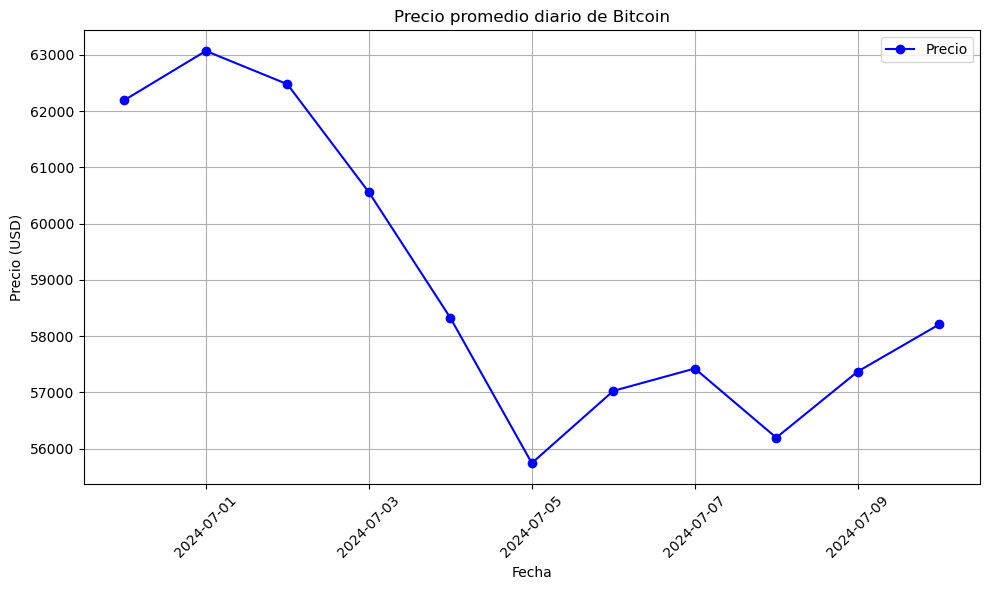

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def obtener_datos_historicos(symbol, days):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days)
    
    # URL de la API 
    url = 'https://api.coingecko.com/api/v3/coins/{symbol}/market_chart/range'
    params = {
        'vs_currency': 'usd',
        'from': int(start_date.timestamp()),
        'to': int(end_date.timestamp())
    }
    
    try:
       
        response = requests.get(url.format(symbol=symbol), params=params)
        response.raise_for_status()
        data = response.json()
        
        df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
        
        # Convertir la columna de timestamp a datetime
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        
        # Redondear la columna de timestamp a la fecha por día
        df['timestamp'] = df['timestamp'].dt.date
        
        # Agrupar por fecha y obtener el precio promedio diario de Bitcoin
        df = df.groupby('timestamp', as_index=False)['price'].mean()
        
        # Guardar los datos en un archivo CSV
        csv_filename = f'{symbol}_historical_data.csv'
        df.to_csv(csv_filename, index=False)
        
        return df
    
    except requests.exceptions.RequestException as e:
        print(f'Error al realizar la solicitud: {e}')
        return None
    except ValueError:
        print('Error al analizar la respuesta JSON.')
        return None

def graficar_datos(df):
    # Configurar el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['price'], marker='o', linestyle='-', color='b', label='Precio')
    plt.title('Precio promedio diario de Bitcoin')
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Obtener datos históricos de Bitcoin 
    symbol = 'bitcoin'
    days = 10
    df_bitcoin = obtener_datos_historicos(symbol, days)
    
    if df_bitcoin is not None:
        print('Datos históricos de Bitcoin:')
        print(df_bitcoin)
        
        # Graficar los datos
        graficar_datos(df_bitcoin)
    else:
        print('No se pudieron obtener los datos históricos de Bitcoin.')



**Objetivos**

Realizar un análisis exploratorio para identificar tendencias, correlaciones y patrones.

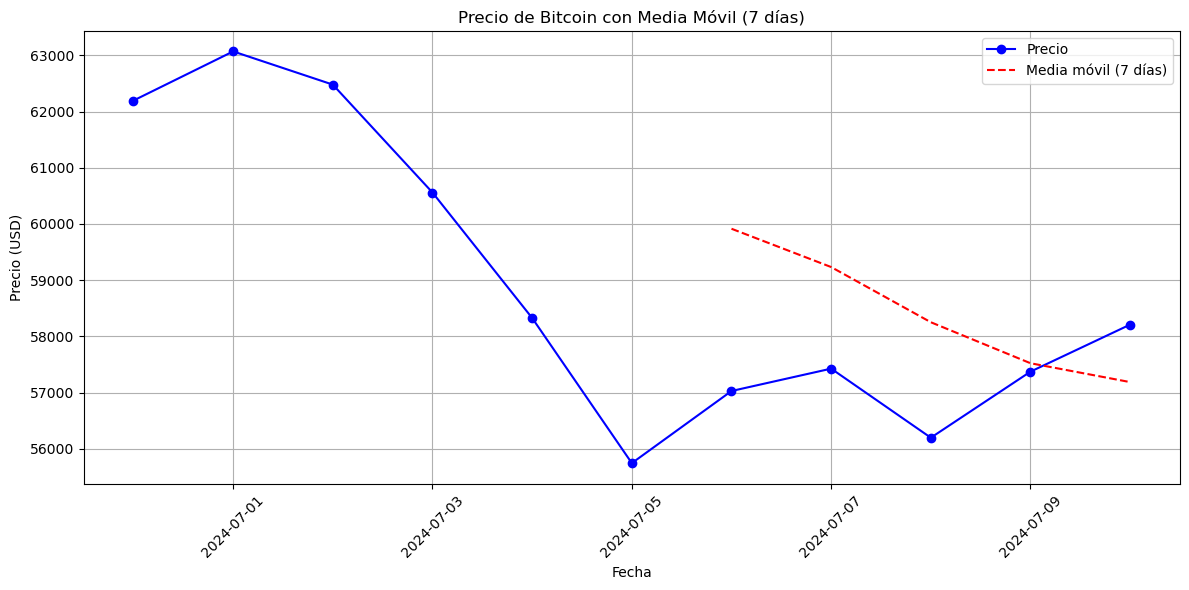

In [6]:
# Calcular la media móvil de 7 días para suavizar los datos
df_bitcoin['rolling_mean'] = df_bitcoin['price'].rolling(window=7).mean()

# Graficar el precio de Bitcoin con la media móvil
plt.figure(figsize=(12, 6))
plt.plot(df_bitcoin['timestamp'], df_bitcoin['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.plot(df_bitcoin['timestamp'], df_bitcoin['rolling_mean'], linestyle='--', color='r', label='Media móvil (7 días)')
plt.title('Precio de Bitcoin con Media Móvil (7 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

. Utilizar técnicas de análisis predictivo para prever posibles movimientos en el mercado.


In [7]:
stats = df_bitcoin['price'].describe()
df_stats = pd.DataFrame({
    'Estadística': stats.index,
    'Valor': stats.values
})

print(df_stats)
csv_filename = 'bitcoin_price_stats.csv'
df_stats.to_csv(csv_filename, index=False)


  Estadística         Valor
0       count     11.000000
1        mean  58963.706034
2         std   2643.107297
3         min  55743.558473
4         25%  57199.391167
5         50%  58209.009548
6         75%  61377.138949
7         max  63069.503840


. Crear visualizaciones interactivas para explorar los datos de las criptomonedas de manera intuitiva.

Datos históricos de Bitcoin:
                                price
timestamp                            
2024-04-12 02:05:58.721  70259.147407
2024-04-12 03:03:28.815  70668.251121
2024-04-12 04:03:54.259  70971.255364
2024-04-12 05:04:07.055  71120.255518
2024-04-12 06:08:57.399  70990.742359


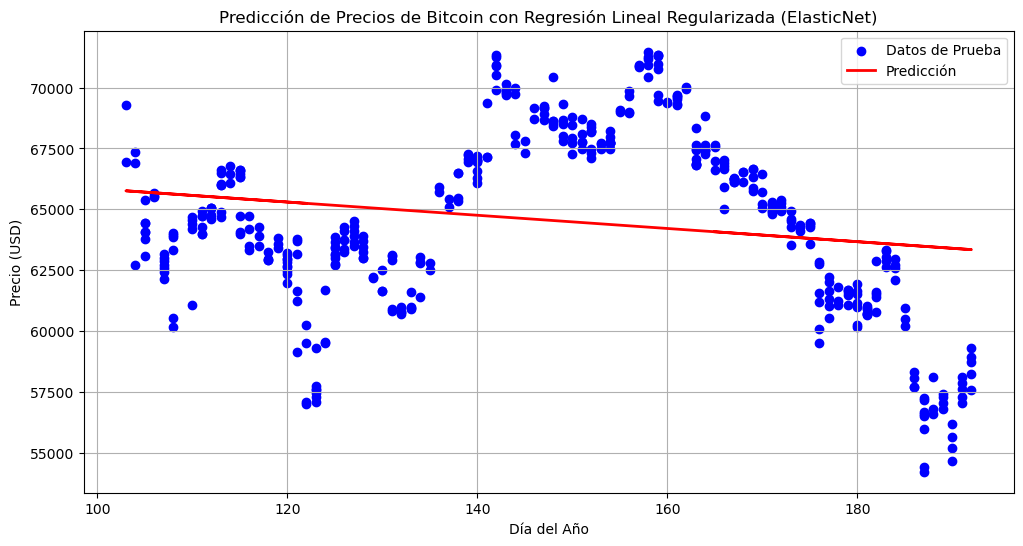

Mean Squared Error (MSE): 13387251.669774354
R^2 Score: 0.028690295652988973


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, timedelta
import requests

# Función para obtener datos históricos de Bitcoin
def obtener_datos_historicos(symbol, days):
    end_date = datetime.utcnow()
    start_date = end_date - timedelta(days=days)
    
    url = f'https://api.coingecko.com/api/v3/coins/{symbol}/market_chart/range'
    params = {
        'vs_currency': 'usd',
        'from': int(start_date.timestamp()),
        'to': int(end_date.timestamp())
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        
        # Procesar datos en un DataFrame de pandas
        df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)
        
        return df
    
    except requests.exceptions.RequestException as e:
        print(f'Error al obtener datos: {e}')
        return None
    except ValueError as ve:
        print(f'Error al procesar JSON: {ve}')
        return None

# Obtener datos históricos de Bitcoin para los últimos 90 días
df_bitcoin = obtener_datos_historicos('bitcoin', 90)

# Verificar y visualizar los datos obtenidos
if df_bitcoin is not None:
    print('Datos históricos de Bitcoin:')
    print(df_bitcoin.head())

    # Preparar datos para la regresión lineal
    df_bitcoin['fecha'] = df_bitcoin.index.date  # Agregar columna de fecha
    df_bitcoin['fecha'] = pd.to_datetime(df_bitcoin['fecha'])  # Convertir a tipo datetime
    df_bitcoin['dia'] = df_bitcoin['fecha'].dt.dayofyear  # Obtener el día del año como característica
    X = df_bitcoin[['dia']].values  # Característica: día del año
    y = df_bitcoin['price'].values  # Variable objetivo: precio de Bitcoin

    # Dividir datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de Regresión Lineal con ElasticNet
    model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
    model.fit(X_train, y_train)

    # Predecir los precios de Bitcoin usando el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Visualizar resultados
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test, color='blue', label='Datos de Prueba')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción')
    plt.title('Predicción de Precios de Bitcoin con Regresión Lineal Regularizada (ElasticNet)')
    plt.xlabel('Día del Año')
    plt.ylabel('Precio (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Imprimir métricas de evaluación
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R^2 Score: {r2}')

else:
    print('No se pudieron obtener los datos históricos de Bitcoin.')




Precio actual desde CoinGecko para BTC: $57396
Diferencias entre precios actuales y precios históricos para BTC:
               price  current_price  price_diff  price_diff_pct
timestamp                                                      
2024-06-10  69505.57          57396   -12109.57      -17.422445
2024-06-11  67319.41          57396    -9923.41      -14.740786
2024-06-12  68247.00          57396   -10851.00      -15.899600
2024-06-13  66742.54          57396    -9346.54      -14.003872
2024-06-14  66006.13          57396    -8610.13      -13.044440


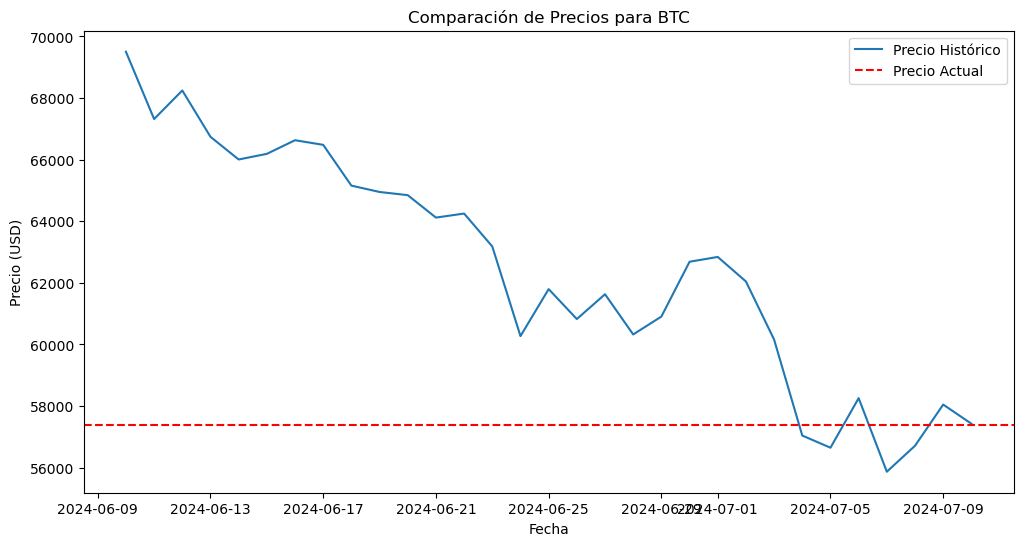

In [15]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Función para obtener datos del mercado desde CoinGecko
def obtener_datos_mercado_coingecko(crypto_ids):
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    params = {
        'vs_currency': 'usd',
        'ids': ','.join(crypto_ids)
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f'Error al realizar la solicitud: {e}')
        return None
    except ValueError:
        print('Error al analizar la respuesta JSON.')
        return None

# Función para obtener datos históricos desde CryptoCompare
def obtener_datos_historicos_cryptocompare(crypto_symbol, days):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,
        'tsym': 'USD',
        'limit': days
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        if data['Response'] == 'Success':
            hist_data = data['Data']['Data']
            df = pd.DataFrame(hist_data)
            df['timestamp'] = pd.to_datetime(df['time'], unit='s')
            df.set_index('timestamp', inplace=True)
            return df[['close']].rename(columns={'close': 'price'})
        else:
            print('Error en la respuesta de la API de CryptoCompare.')
            return None
    except requests.exceptions.RequestException as e:
        print(f'Error al realizar la solicitud: {e}')
        return None
    except ValueError as ve:
        print(f'Error al procesar JSON: {ve}')
        return None

# Función para comparar datos actuales y datos históricos entre CoinGecko y CryptoCompare
def comparar_datos(crypto_ids, crypto_symbol, days):
    # Obtener datos del mercado desde CoinGecko
    datos_mercado_coingecko = obtener_datos_mercado_coingecko(crypto_ids)
    if not datos_mercado_coingecko:
        print('No se pudieron obtener los datos del mercado desde CoinGecko.')
        return

    # Obtener datos históricos desde CryptoCompare
    df_historico_cryptocompare = obtener_datos_historicos_cryptocompare(crypto_symbol, days)
    if df_historico_cryptocompare is None:
        print(f'No se pudieron obtener los datos históricos desde CryptoCompare para {crypto_symbol}.')
        return

    # Crear DataFrame para los datos del mercado desde CoinGecko
    df_mercado_coingecko = pd.DataFrame(datos_mercado_coingecko)
    datos_mercado_coingecko_filtered = df_mercado_coingecko[df_mercado_coingecko['symbol'] == crypto_symbol.lower()]

    # Verificar si se obtuvo algún dato del mercado desde CoinGecko para el símbolo especificado
    if datos_mercado_coingecko_filtered.empty:
        print(f'No se encontraron datos del mercado desde CoinGecko para {crypto_symbol}.')
        return

    # Mostrar resultados actuales
    precio_actual = datos_mercado_coingecko_filtered.iloc[0]['current_price']
    print(f'Precio actual desde CoinGecko para {crypto_symbol}: ${precio_actual}')

    # Comparar precios históricos con el precio actual
    df_historico_cryptocompare['current_price'] = precio_actual
    df_historico_cryptocompare['price_diff'] = df_historico_cryptocompare['current_price'] - df_historico_cryptocompare['price']
    df_historico_cryptocompare['price_diff_pct'] = (df_historico_cryptocompare['price_diff'] / df_historico_cryptocompare['price']) * 100

    # Mostrar las diferencias
    print(f'Diferencias entre precios actuales y precios históricos para {crypto_symbol}:')
    print(df_historico_cryptocompare.head())

    # Visualizar la comparación
    plt.figure(figsize=(12, 6))
    plt.plot(df_historico_cryptocompare.index, df_historico_cryptocompare['price'], label='Precio Histórico')
    plt.axhline(y=precio_actual, color='r', linestyle='--', label='Precio Actual')
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.title(f'Comparación de Precios para {crypto_symbol}')
    plt.legend()
    plt.show()

# Ejemplo de uso
crypto_ids = ['bitcoin']
crypto_symbol = 'BTC'
days = 30
comparar_datos(crypto_ids, crypto_symbol, days)
